In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import pickle
%matplotlib inline

In [2]:
from models import rnn, lstm, bjrnn, cfrnn,copulaCPTS, dplstm

# Plotting. 

This notebook uses results from running ```python particle_exp.py```. Please run the experiment before running the plotting code.

In [95]:
c_allruns = []
a_allruns = []

with open('./trained/results_particle5_run0.pkl', 'rb') as f:
    (a, c)= pickle.load(f)
    a_allruns.append(a)
    c['bjrnn'] = 1-np.array(c['bjrnn'])
    c_allruns.append(c)
    
with open('./trained/results_particle5_run1.pkl', 'rb') as f:
    (a, c)= pickle.load(f)
    a_allruns.append(a)
    c['bjrnn'] = 1-np.array(c['bjrnn'])
    c_allruns.append(c)
    
with open('./trained/results_particle5_run2.pkl', 'rb') as f:
    (a, c)= pickle.load(f)
    a_allruns.append(a)
    c['bjrnn'] = 1-np.array(c['bjrnn'])
    c_allruns.append(c)
    


In [97]:
c_allruns01 = []
a_allruns01 = []
with open('./trained/results_particle1_run0.pkl', 'rb') as f:
    (a, c)= pickle.load(f)
    a_allruns01.append(a)
    c['bjrnn'] = 1-np.array(c['bjrnn'])
    c_allruns01.append(c)
    
with open('./trained/results_particle1_run1.pkl', 'rb') as f:
    (a, c)= pickle.load(f)
    a_allruns01.append(a)
    c['bjrnn'] = 1-np.array(c['bjrnn'])
    c_allruns01.append(c)
    
with open('./trained/results_particle1_run2.pkl', 'rb') as f:
    (a, c)= pickle.load(f)
    a_allruns01.append(a)
    c['bjrnn'] = 1-np.array(c['bjrnn'])
    c_allruns01.append(c)

In [30]:
with open('./trained/results_particle5_all.pkl', 'wb') as f:
    pickle.dump( (a_allruns, c_allruns),f)


In [31]:
with open('./trained/results_particle1_all.pkl', 'wb') as f:
    pickle.dump( (a_allruns01, c_allruns01),f)

In [99]:
cov_erros_5 = {}
area_erros_5 = {}
coverages_5 = {}
areas_5 = {}
for k in c_allruns[0].keys():
    cov_erros_5[k] = np.std(list(c[k] for c in c_allruns), axis=0, ddof=1)
    coverages_5[k] = np.mean(list(c[k] for c in c_allruns), axis=0)

    area_erros_5[k] = np.std(list(c[k] for c in a_allruns), axis=0, ddof=1)
    areas_5[k] = np.mean(list(c[k] for c in a_allruns), axis=0)


In [100]:
cov_erros_1 = {}
area_erros_1 = {}
coverages_1 = {}
areas_1 = {}
for k in c_allruns01[0].keys():
    cov_erros_1[k] = np.std(list(c[k] for c in c_allruns01), axis=0, ddof=1)
    coverages_1[k] = np.mean(list(c[k] for c in c_allruns01), axis=0)

    area_erros_1[k] = np.std(list(c[k] for c in a_allruns01), axis=0, ddof=1)
    areas_1[k] = np.mean(list(c[k] for c in a_allruns01), axis=0)


# for 0.5

In [40]:
#90%
for k in keys:
    print(k, round(coverages_5[k][1]*100,1), '\plusminus', round(cov_erros_5[k][1]*100,1), '&',
           round(areas_5[k][1],2) ,'\plusminus',  round(area_erros_5[k][1],2))

dprnn 41.1 \plusminus 2.0 & 2.19 \plusminus 0.07
bjrnn 100.0 \plusminus 0.0 & 12.13 \plusminus 0.39
cfrnn 94.1 \plusminus 1.5 & 5.55 \plusminus 0.72
cf-EncDec 95.3 \plusminus 1.8 & 6.74 \plusminus 1.57
copula-rnn 89.4 \plusminus 1.1 & 4.4 \plusminus 0.15
copula-EncDec 90.5 \plusminus 2.2 & 2.54 \plusminus 0.41


In [41]:
#95%
for k in keys:
    print(k, round(coverages_5[k][0]*100,1), '\plusminus', round(cov_erros_5[k][0]*100,1), '&',
       round(areas_5[k][0],2) ,'\plusminus',  round(area_erros_5[k][0],2))

dprnn 53.7 \plusminus 3.0 & 3.1 \plusminus 0.1
bjrnn 100.0 \plusminus 0.0 & 15.43 \plusminus 0.85
cfrnn 96.9 \plusminus 1.7 & 8.57 \plusminus 2.38
cf-EncDec 97.7 \plusminus 0.8 & 8.84 \plusminus 2.58
copula-rnn 91.9 \plusminus 1.4 & 4.76 \plusminus 0.18
copula-EncDec 94.2 \plusminus 2.0 & 3.25 \plusminus 0.36


# for 0.1

In [81]:
#90%
for k in coverages_1.keys():
    print(k, round(coverages_1[k][1]*100,1), '\plusminus', round(cov_erros_1[k][1]*100,1), '&',
           round(areas_1[k][1],2) ,'\plusminus',  round(area_erros_1[k][1],2))

dprnn 94.3 \plusminus 2.3 & 2.2 \plusminus 0.08
bjrnn 98.9 \plusminus 0.2 & 2.24 \plusminus 0.59
cfrnn 97.3 \plusminus 1.1 & 1.59 \plusminus 0.26
copula-rnn 89.9 \plusminus 1.5 & 1.84 \plusminus 0.18
cf-EncDec 97.0 \plusminus 1.2 & 2.31 \plusminus 0.13
copula-EncDec 90.2 \plusminus 2.3 & -0.91 \plusminus 0.19


In [82]:
#95%
for k in coverages_1.keys():
    print(k, round(coverages_1[k][0]*100,1), '\plusminus', round(cov_erros_1[k][0]*100,1), '&',
       round(areas_1[k][0],2) ,'\plusminus',  round(area_erros_1[k][0],2))

dprnn 96.8 \plusminus 1.1 & 3.13 \plusminus 0.11
bjrnn 99.6 \plusminus 0.3 & 2.75 \plusminus 0.71
cfrnn 99.5 \plusminus 0.2 & 4.34 \plusminus 2.1
copula-rnn 95.1 \plusminus 1.4 & 2.12 \plusminus 0.17
cf-EncDec 98.6 \plusminus 0.7 & 4.47 \plusminus 1.48
copula-EncDec 95.1 \plusminus 1.3 & -0.63 \plusminus 0.25


# updating experiment results

In [102]:
epsilon_ls = np.linspace(0.05, 0.50, 10)

x_axis = 1-epsilon_ls

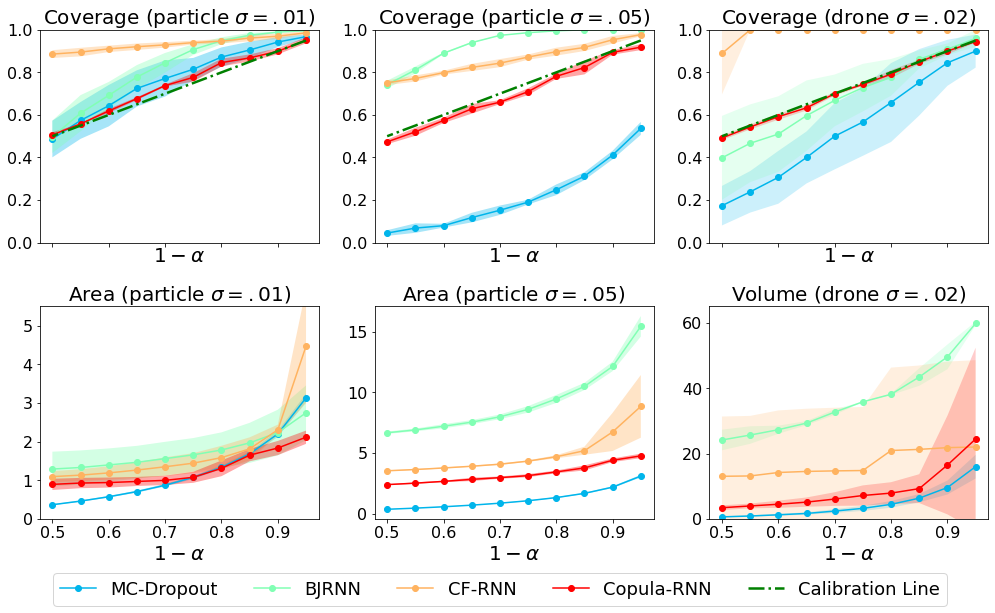

In [110]:
import matplotlib.cm as cm

axisfont = 20
titlefont = 24
tickfont = 16

fig, ax = plt.subplots(2, 3, figsize=(17, 9), sharex=True)
keys = ['dprnn', 'bjrnn', 'cf-EncDec', 'copula-rnn'] #, 'copula-EncDec'] #'cf-EncDec',
colors = cm.rainbow(np.linspace(0, 1, len(keys)+1))[1:]

for i, name in enumerate(keys):
    
    if name == 'dprnn':
        lab = 'MC-Dropout'
    elif name == 'cf-EncDec':
        lab = 'CF-RNN'
    elif name == 'bjrnn':
        lab = 'BJRNN'
    elif name == 'copula-rnn':
        lab = 'Copula-RNN'
    else:
        lab = name
        
    # Coverage
    ax[0,0].plot(x_axis, coverages_1[name], linestyle='-',
                   marker='o', label=lab, color=colors[i])
    ax[0,0].fill_between(x_axis, coverages_1[name]-cov_erros_1[name], 
                       coverages_1[name]+cov_erros_1[name], alpha=0.35, facecolor=colors[i])
    ax[0,0].set_ylim(0, 1)
    ax[0,0].tick_params(axis='both', which='major', labelsize=tickfont)
    
    # Width
    ax[1,0].plot(x_axis, areas_1[name], linestyle='-',
                    marker='o', label=lab, color=colors[i])
    ax[1,0].fill_between(x_axis,  areas_1[name]-area_erros_1[name], areas_1[name]+area_erros_1[name], 
                       alpha=0.35, facecolor=colors[i])
    ax[1,0].set_ylim(0, 5.5)

    ax[1,0].tick_params(axis='both', which='major', labelsize=tickfont)

    # Coverage
    ax[0,1].plot(x_axis, coverages_5[name], linestyle='-',
                   marker='o', label=lab, color=colors[i])
    ax[0,1].fill_between(x_axis, coverages_5[name]-cov_erros_5[name], 
                       coverages_5[name]+cov_erros_5[name], alpha=0.35, facecolor=colors[i])
    ax[0,1].set_ylim(0, 1)
    ax[0,1].tick_params(axis='both', which='major', labelsize=tickfont)
    
    # Width
    ax[1,1].plot(x_axis, areas_5[name], linestyle='-',
                    marker='o', label=lab, color=colors[i])
    ax[1,1].fill_between(x_axis,  areas_5[name]-area_erros_5[name], areas_5[name]+area_erros_5[name], 
                       alpha=0.35, facecolor=colors[i])
    ax[1,1].tick_params(axis='both', which='major', labelsize=tickfont)

    ax[0,2].plot(x_axis, coverages_d[name], linestyle='-',
                   marker='o', label=lab, color=colors[i])
    ax[0,2].fill_between(x_axis, coverages_d[name]-cov_erros_d[name], 
                       coverages_d[name]+cov_erros_d[name], alpha=0.20, facecolor=colors[i])
    ax[0,2].set_ylim(0, 1)
    ax[0,2].tick_params(axis='both', which='major', labelsize=tickfont)
    
    # Width
    ax[1,2].plot(x_axis, areas_d[name], linestyle='-',
                    marker='o', label=lab, color=colors[i])
    ax[1,2].fill_between(x_axis,  areas_d[name]-area_erros_d[name], areas_d[name]+area_erros_d[name], 
                       alpha=0.20, facecolor=colors[i])
    ax[1,2].tick_params(axis='both', which='major', labelsize=tickfont)
    ax[1,2].set_ylim(0,65)


for i in range(3):
    ax[0,i].plot(x_axis, x_axis, linestyle='-.',linewidth=2.5, color='green', label='Calibration Line')
for i in range(2):
    for j in range(3):
        ax[i,j].set_xlabel(r'$1-\alpha$', fontsize=axisfont)

ax[0,0].set_title('Coverage (particle $\sigma=.01$)', fontsize=axisfont)
ax[1,0].set_title('Area (particle $\sigma=.01$)', fontsize=axisfont)
ax[0,1].set_title('Coverage (particle $\sigma=.05$)', fontsize=axisfont)
ax[1,1].set_title('Area (particle $\sigma=.05$)', fontsize=axisfont)

ax[0,2].set_title('Coverage (drone $\sigma=.02$)', fontsize=axisfont)
ax[1,2].set_title('Volume (drone $\sigma=.02$)', fontsize=axisfont)

ax[0,1].legend(loc='lower center', bbox_to_anchor=(0.45, -1.75), ncol=5, fontsize=axisfont-2)
plt.subplots_adjust(wspace=0.2, 
                    hspace=0.3)

#bbox_to_anchor=(-0.75, -0.18), ncol=5, fontsize=axisfont-2)